# Multivariate and Bivariate Analysis

Bivariate analysis:
Bivariate analysis is a statistical analysis technique that involves analyzing the relationship between two variables. The focus is on understanding how one variable is related to another variable. Common techniques used in bivariate analysis include scatter plots, correlation analysis, and contingency tables. Bivariate analysis is often used to explore the relationship between two variables, to test hypotheses about the relationship, and to identify potential outliers or influential observations.

Multivariate analysis:
Multivariate analysis is a statistical analysis technique that involves analyzing the relationship between multiple variables. The focus is on understanding how multiple variables are related to each other. Multivariate analysis techniques include regression analysis, factor analysis, and principal component analysis. Multivariate analysis is often used to identify patterns and relationships among multiple variables, to predict outcomes based on multiple variables, and to identify important variables that contribute to the outcome of interest.

In summary, while univariate analysis focuses on analyzing a single variable, bivariate analysis focuses on analyzing the relationship between two variables, and multivariate analysis focuses on analyzing the relationship between multiple variables. These techniques are often used in combination to gain a more comprehensive understanding of the data.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
titanic = pd.read_csv('train.csv')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('iris')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.00,0,0,W./C. 14263,10.5000,NaN,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.00,0,0,348121,7.6500,F G63,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [5]:
flights.sample(5)

,year,month,passengers
94,1956,Nov,271
132,1960,Jan,417
68,1954,Sep,259
139,1960,Aug,606
122,1959,Mar,406


In [6]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
136,6.3,3.4,5.6,2.4,virginica
77,6.7,3.0,5.0,1.7,versicolor
120,6.9,3.2,5.7,2.3,virginica
104,6.5,3.0,5.8,2.2,virginica
80,5.5,2.4,3.8,1.1,versicolor


### 📌 Scatterplot (Numerical - Numerical)

<Axes: xlabel='total_bill', ylabel='tip'>

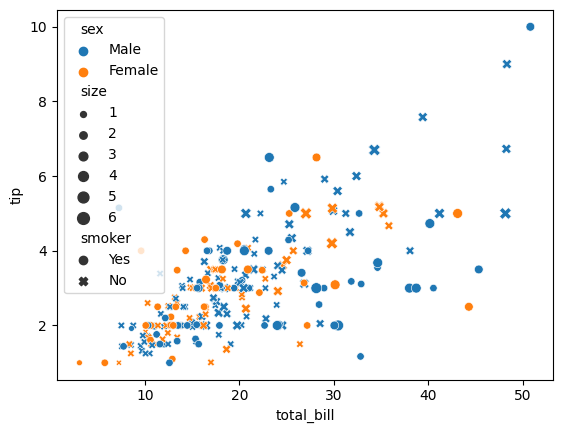

In [7]:
sns.scatterplot(x = tips['total_bill'], y = tips['tip'], hue=tips['sex'], style=tips['smoker'], size=tips['size'])

### 📌 Barplot (Numerical - Categorical)

<Axes: xlabel='Pclass', ylabel='Age'>

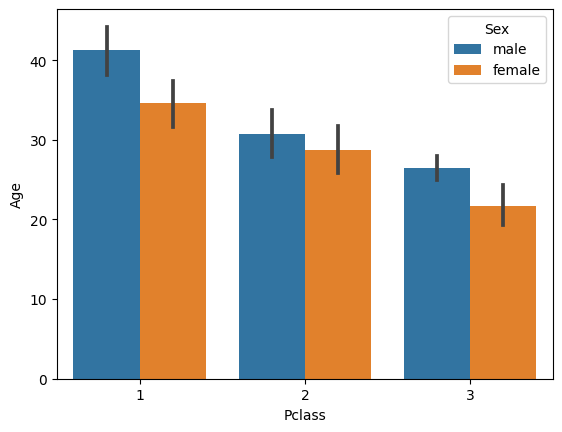

In [8]:
sns.barplot(x=titanic['Pclass'], y=titanic['Age'], hue=titanic['Sex'])

### 📌 Boxplot (Categorical - Numerical)

<Axes: xlabel='Sex', ylabel='Age'>

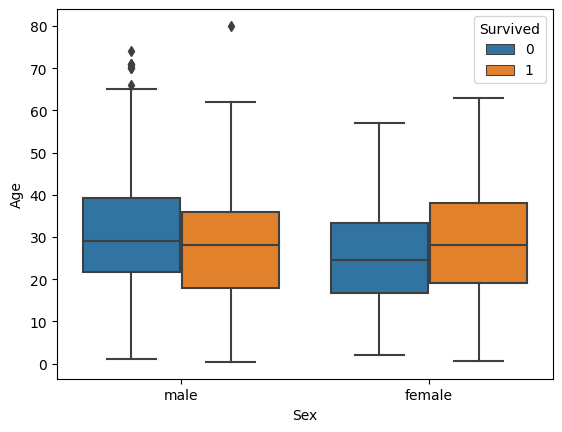

In [9]:
sns.boxplot(x=titanic['Sex'], y=titanic['Age'], hue=titanic['Survived'])

### 📌 Distplot (Categorical - Numerical)

/tmp/ipykernel_13068/385736575.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==0]['Age'], hist=False)
/tmp/ipykernel_13068/385736575.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==1]['Age'], hist=False)


<Axes: xlabel='Age', ylabel='Density'>

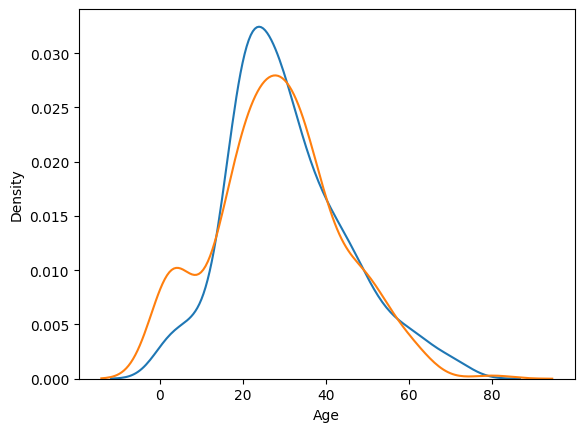

In [10]:
sns.distplot(titanic[titanic['Survived']==0]['Age'], hist=False)
sns.distplot(titanic[titanic['Survived']==1]['Age'], hist=False)

### 📌 Heatmap (Categorical - Categorical)

<Axes: xlabel='Survived', ylabel='Pclass'>

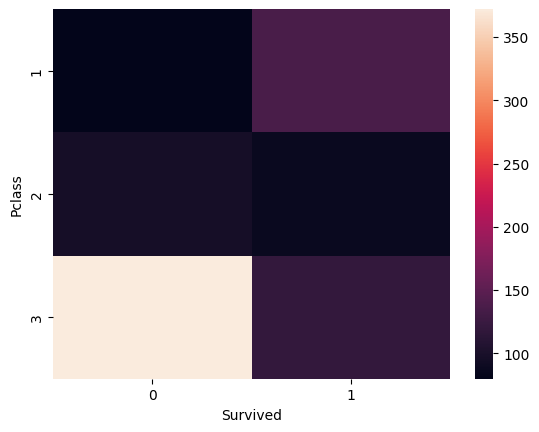

In [11]:
sns.heatmap(pd.crosstab(titanic['Pclass'], titanic['Survived']))

<Axes: xlabel='year', ylabel='month'>

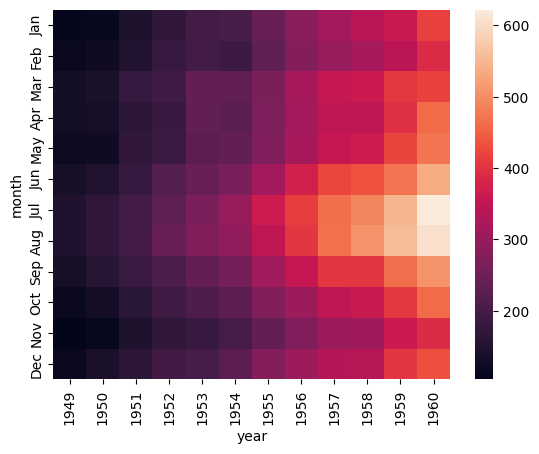

In [12]:
sns.heatmap(flights.pivot_table(values='passengers', index='month', columns='year'))

### 📌 Clustermap (Categorical - Categorical)

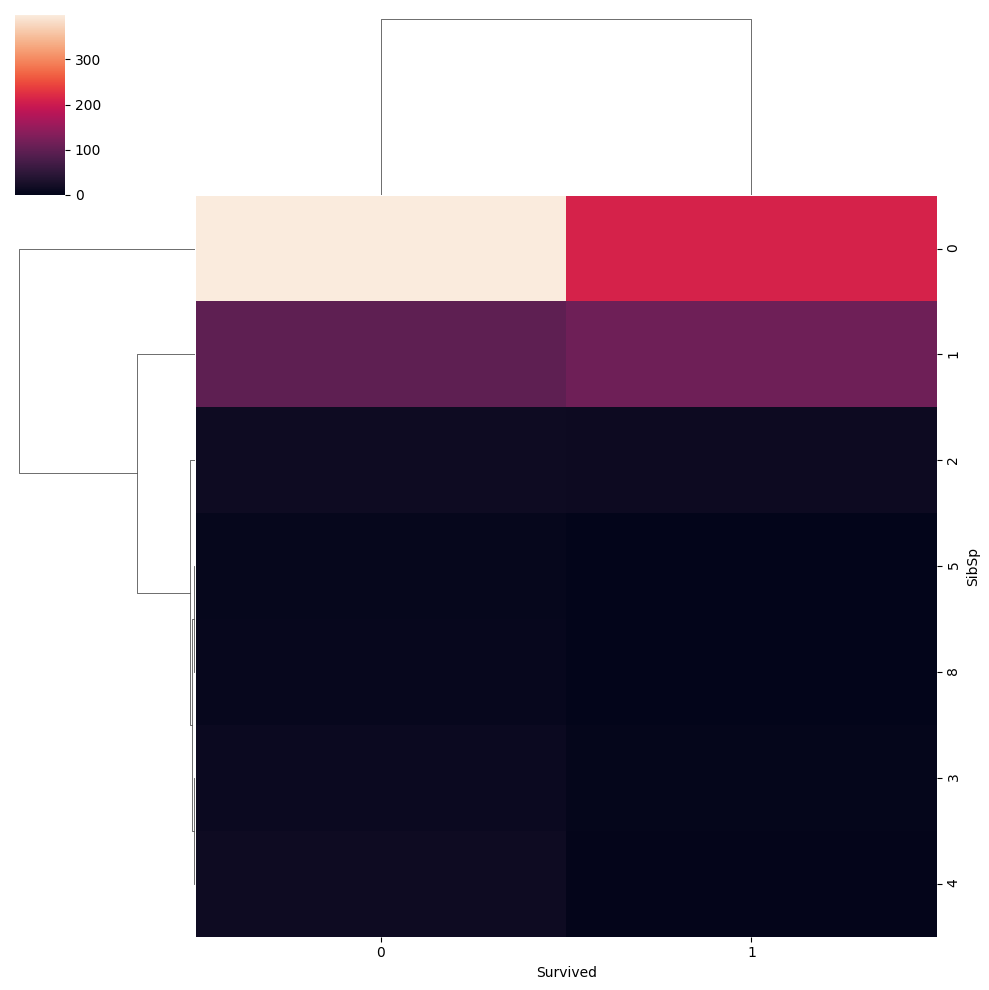

In [13]:
sns.clustermap(pd.crosstab(titanic['SibSp'], titanic['Survived']))

### 📌 Pairplot

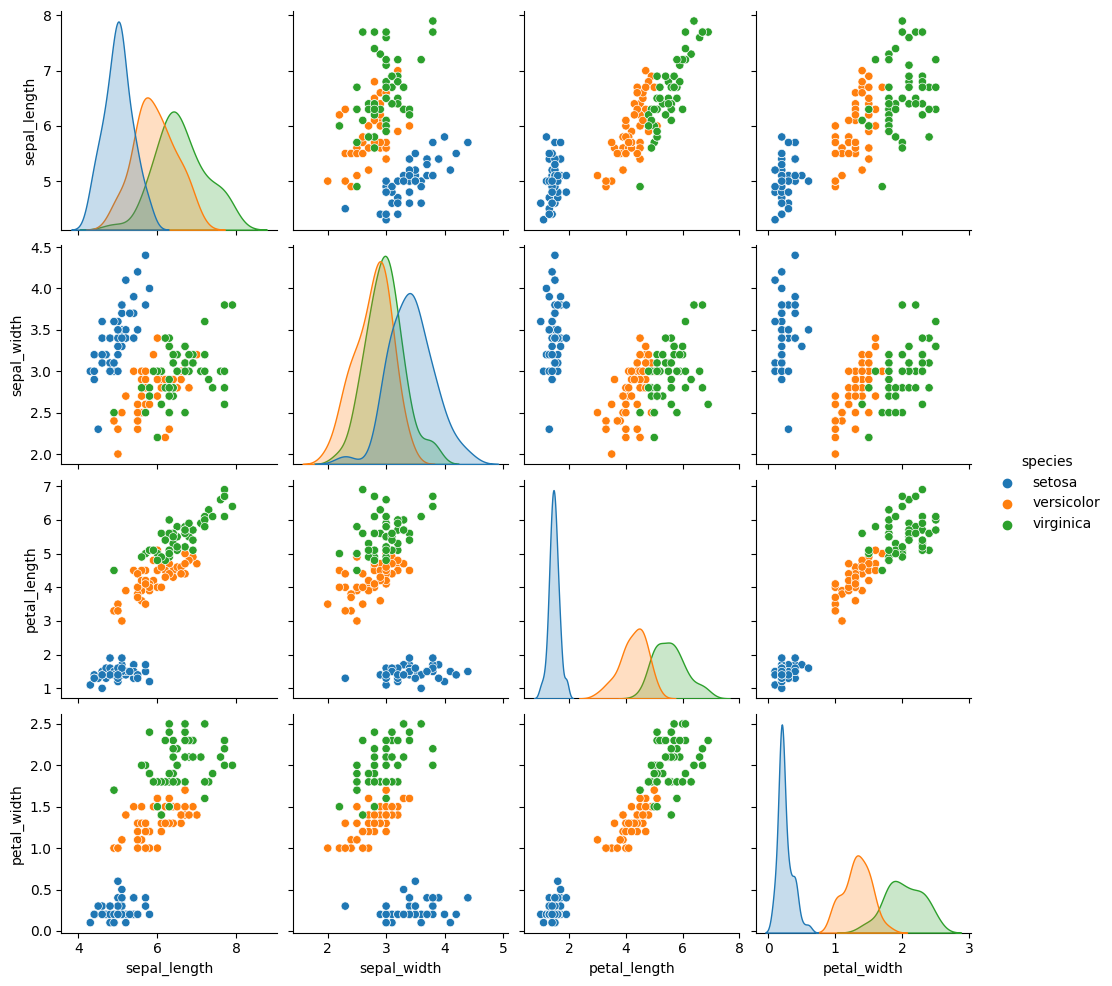

In [14]:
sns.pairplot(iris, hue='species')

### 📌 Lineplot (Numerical - Numerical)

/tmp/ipykernel_13068/3975016471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new = flights.groupby('year').sum().reset_index()


<Axes: xlabel='year', ylabel='passengers'>

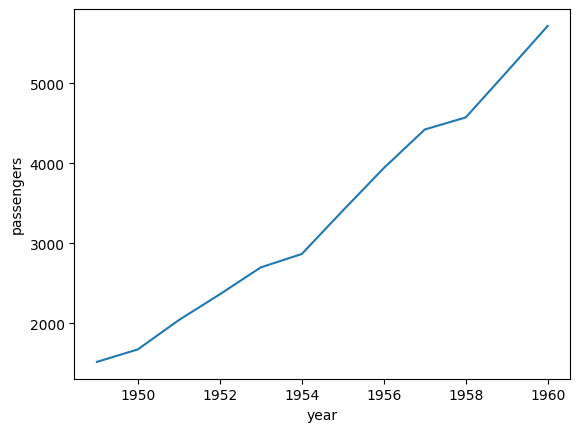

In [15]:
new = flights.groupby('year').sum().reset_index()
sns.lineplot(x=new['year'], y=new['passengers'])